<h1>PHY 2200 - Computational Physics</h1>
<h2>Spring 2023</h2>

<h2>Complexity and emergence</h2>

In [1]:
import numpy as np
from matplotlib import pyplot as plt

After a splash of exploring chaos and nonlinear dynamics, we now turn attention to the concept of <b>emergent behavior</b>, or how interesting behavior can emerge at large scales which doesn't obviously follow from the underlying, "microscopic" laws governing the system.

As an introduction to this topic, let us consider <b>Conway's game of life</b>. The "game" is actually a simulation of a <b>cellular automaton</b> played on a two-dimensional grid in which each cell can take one of two values, 0 or 1 (traditionally, represented by black and white, respectively). 

<img src="conway1.png" width=400>

Each cell can be "alive" (white) or "dead" (black). Given some initial configuration, such as the state shown above, the grid is updated at each successive time step via the following rules:

- Each live cell with fewer than two live neighbors dies (due to "loneliness")
- Each live cell with more than three live neighbors dies (due to "overcrowding")
- Each live cell with exactly two or three live neighbors lives
- Each dead cell with exactly three live neighbors becomes live ("reproduction" or "zombies" depending on how you look at it)

The term "neighbors" refers to <i>eight</i> nearest-neighboring cells on the grid as shown below for the generic cell index $(i,j)$. For any <i>interior</i> cell, there are the right/left neighbors $(i,j\pm 1)$, above/below neighbors $(i\pm1,j)$, and the four corners $(i+1,j\pm1)$, $(i-1,j\pm1)$.

<img src="conwaygrid.png" width=400>

Neighbors become trickier to define along the edges, or boundaries of the system. For now, let's use <b>periodic boundary conditions</b> (think "Pac-Man boundaries) which connect the upper and lower sides (as well as the right and left sides).

<img src="torus.png" width=400>

That is, going beyond the top of the system carries you to the bottom, and going to the right ultimately brings you back to the left. Topologically, this makes the system's geometry equivalent to that of a <b>torus</b>.

As a first step toward simulating this system, let's define a function `nn(i,j,N)` which computes the indices used to find the eight nearest neighbors. The core idea is to look right ($j+1$), left ($j-1$), up ($i-1$), and down ($i+1$). We're using the matrix convention for indices where $i$ labels the row and $j$ labels the column. If any of those fall outside the range $(0,N-1)$, we employ the periodic boundary conditions. In short, $-1$ gets mapped to $N-1$, and $N$ gets mapped to $0$.

In [2]:
def nn(i,j,N):
    if i==0:
        il = N-1
        ir = 1    
    elif i==N-1:
        il = N-2
        ir = 0
    else:
        il = i-1
        ir = i+1
        
    if j==0:
        jl = N-1
        jr = 1    
    elif j==N-1:
        jl = N-2
        jr = 0
    else:
        jl = j-1
        jr = j+1 
    
    return [il,ir,jl,jr]        

The process of evolving the system amounts to scrolling through all grid points $(i,j)$ (two loops), computing the <i>sum</i> of neighboring values, and updating the cell according to the rules. To aid in this process, let us write a function that takes the system array and executes these steps, returning an updated system array.

Note that we can't overwrite the system array <i>while</i> updating. We need to know all of the old values while we compute the new ones, so it's best to start with a blank array that we fill in according to the rules applied to the old values.

In [3]:
def conwaystep(x):
    N = len(x) #get system size (assumed square)
    xnew = np.zeros((N,N)) #array to store updated values
    
    for i in range(0,N):
        for j in range(0,N):
            neighbors = nn(i,j,N)
            (il,ir,jl,jr) = neighbors
            nsum = x[i,jl] + x[i,jr] + x[il,j] + x[ir,j]
            nsum = nsum + x[il,jl] + x[il,jr] + x[ir,jl] + x[ir,jr]
            
            if x[i,j]==1:
                if nsum==2 or nsum==3:
                    xnew[i,j] = 1
                
            else:
                if nsum==3:
                    xnew[i,j] = 1
                    
    return xnew

Since we initialize an array of zeros, we just have to test for which cells will be alive in the next step.

This is a somewhat more complicated system than those we have studied so far which yielded plots or static images. At each time step, we will have a two-dimensional array describing the state of the system. The easiest way to visualize the system's evolution is to make an animation showing how the system changes in time. 

Our strategy will be to do all the computation first, storing each system time step as a slice of a <b>three-dimensional array</b>. This is terribly wasteful, storing all of the information for all times. But it's a simple method that works fine for small systems over a reasonably small number of time steps.

The basic idea is to initialize the first "slice" of the three-dimensional array to our initial configuration. To begin, we take a random sampling of zeros and ones (dead and alive). At each time step, we update the next slice using our function `conwaystep(x)`. That's pretty much it.

In [4]:
N = 50
Nt = 100
x = np.zeros((N,N,Nt))

x[:,:,0] = np.random.randint(0,2,(N,N))
for n in range(0,Nt-1):
    x[:,:,n+1] = conwaystep(x[:,:,n])

Animations can be... tricky. Here's an incredibly simple method Larry Engelhardt (Francis Marion University) showed me some time ago. First, we import the following:

In [5]:
from time import sleep # To set the animation frame rate 
from IPython.display import clear_output # To redraw

Next, loop over all the slices (time steps) and depict each slice using `plt.imshow()`. You can adjust the speed of the animation by changing the argument of `sleep()`. Run the following, and you should see an animation showing the evolution of your initial state.

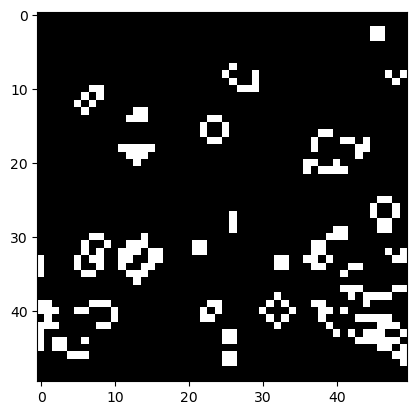

In [6]:
for n in range(0,Nt):
    sleep(0.01) # Sets the maximum animation speed
    plt.imshow(x[:,:,n],cmap='gray')
    clear_output(wait=True)
    plt.show()

You might want to increase the value of `Nt` to let the system evolve for a longer time. Keep in mind that with random initial conditions, you'll see something different each time. If you run this a few times, you should see some fairly complicated behavior. Some "structures" will undergo elaborate evolution before fizzling out. But some structures are actually long-lived. Can you find any "gliders" that translate themselves along diagonal trajectories?

It might be difficult to spot some of these interesting features. Using a (roughly) equal mix of alive and dead cells is somewhat crowded, and the periodic boundary conditions add to this. One of the simplest interesting objects is the basic glider. Below is a smaller system in which a particular shape is initialized.

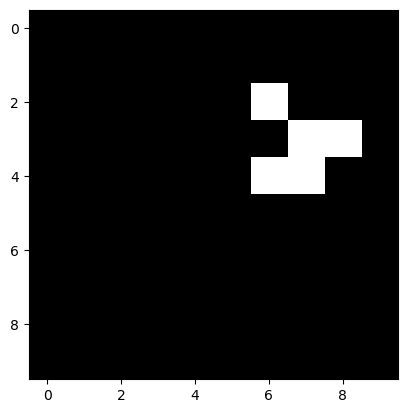

In [7]:
N = 10
Nt = 100
x = np.zeros((N,N,Nt))

x[:,:,0] = np.zeros((N,N))

### pattern for simple glider
x[2,6,0] = 1
x[3,7,0] = 1
x[3,8,0] = 1
x[4,6,0] = 1
x[4,7,0] = 1

plt.imshow(x[:,:,0],cmap='gray')
plt.show()

Through a sequence of four steps, this shape translates itself down and to the right. You can watch the evolution of it by using the `conwaystep(x)` function.

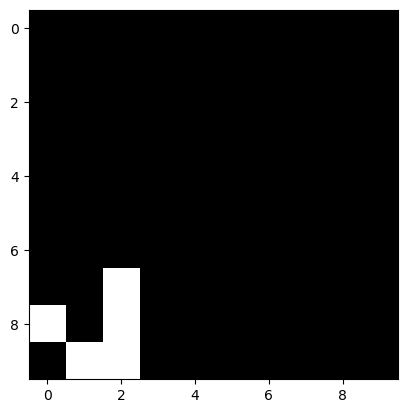

In [8]:
for n in range(0,Nt-1):
    x[:,:,n+1] = conwaystep(x[:,:,n])
    
    
for n in range(0,Nt):
    sleep(0.1) # Sets the maximum animation speed
    plt.imshow(x[:,:,n],cmap='gray')
    clear_output(wait=True)
    plt.show()

An unbelievable variety of of [complicated structures](https://conwaylife.appspot.com/library/) that have been discovered with this toy Universe. It's especially amazing that Conway used to simulate this in the early 1970's using the board-game [Go](https://en.wikipedia.org/wiki/Go_(game)) and manually computing each step in the evolution. Below is an example of a so-called <b>glider gun</b>, which creates a stream of gliders.

You might want to increase the number of time steps. Be warned, with periodic boundary conditions, the gliders "circle back." Depending on the dimensions and location of the glider gun, they might collide with the gun and wreck the whole process. But we'll deal with boundaries shortly. 

The parameters `ni` and `nj` serve to shift the basic shape from the upper-left corner by some vertical and horizontal distance, respectively.

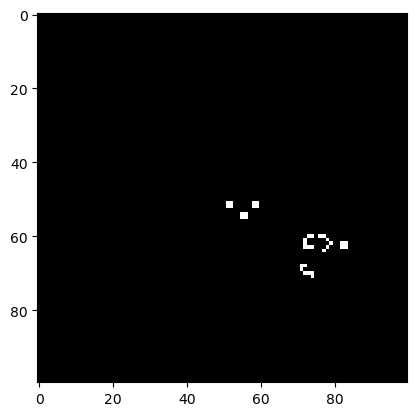

In [9]:
N = 100
Nt = 300
x = np.zeros((N,N,Nt))

x[:,:,0] = np.zeros((N,N))
ni = 50
nj = 50
### pattern for Simkin glider gun
x[1+ni,1+nj,0] = 1
x[2+ni,1+nj,0] = 1
x[1+ni,2+nj,0] = 1
x[2+ni,2+nj,0] = 1

x[1+ni,8+nj,0] = 1
x[2+ni,8+nj,0] = 1
x[1+ni,9+nj,0] = 1
x[2+ni,9+nj,0] = 1

x[4+ni,5+nj,0] = 1
x[5+ni,5+nj,0] = 1
x[4+ni,6+nj,0] = 1
x[5+ni,6+nj,0] = 1

x[10+ni,23+nj,0] = 1
x[10+ni,24+nj,0] = 1
x[10+ni,26+nj,0] = 1
x[10+ni,27+nj,0] = 1

x[11+ni,22+nj,0] = 1
x[11+ni,28+nj,0] = 1

x[12+ni,22+nj,0] = 1
x[12+ni,29+nj,0] = 1
x[12+ni,32+nj,0] = 1
x[12+ni,33+nj,0] = 1

x[13+ni,22+nj,0] = 1
x[13+ni,23+nj,0] = 1
x[13+ni,24+nj,0] = 1
x[13+ni,28+nj,0] = 1
x[13+ni,32+nj,0] = 1
x[13+ni,33+nj,0] = 1

x[14+ni,27+nj,0] = 1

x[18+ni,21+nj,0] = 1
x[18+ni,22+nj,0] = 1

x[19+ni,21+nj,0] = 1

x[20+ni,22+nj,0] = 1
x[20+ni,23+nj,0] = 1
x[20+ni,24+nj,0] = 1

x[21+ni,24+nj,0] = 1


plt.imshow(x[:,:,0],cmap='gray')
plt.show()

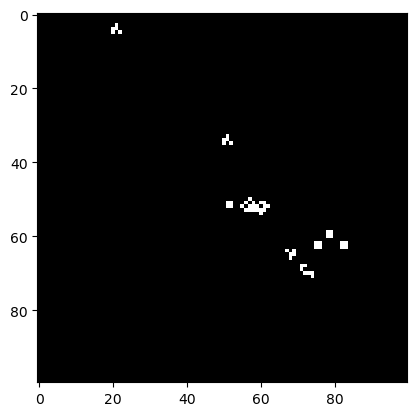

In [10]:
for n in range(0,Nt-1):
    x[:,:,n+1] = conwaystep(x[:,:,n])
    
    
for n in range(0,Nt):
    sleep(0.01) # Sets the maximum animation speed
    plt.imshow(x[:,:,n],cmap='gray')
    clear_output(wait=True)
    plt.show()

Conway's game of life is just one type of cellular automaton (CA). It's interesting because it's a striking example of how incredibly complicated behavior emerges from incredibly simple rules. Who could look at the rules and predict the existence of a glider gun? Or [this](https://oimo.io/works/life/)?

In the exercises below, you'll explore some other aspects of Conway's game of life and some other types of cellular automata. Aside from being instructive with respect to the concept of emergence, [some](https://writings.stephenwolfram.com/2020/04/finally-we-may-have-a-path-to-the-fundamental-theory-of-physics-and-its-beautiful/) even think the Universe might be some kind of CA (though admittedly a bit more complex than Conway's game of life).

## Exercises

### 1. Boundary conditions

Periodic boundary conditions are often the simplest to implement, but they're not always the most useful. Suppose we'd like to consider an infinite system but we only care about what happens on some finite domain (say $100\times 100$).

It's helpful to rethink how we approach getting the boundary index values entirely. We'll have to modify both the `nn()` and `conwaystep()` functions to function with a variable number of nearest-neighbors. For example, an interior point will still have eight neighbors. But, for example, a point on the top boundary ($i=0$) will only have five since all cells with $i-1$ will be assumed to take the value zero.

Complete the function `nn2(i,j,N)` to return all eight neighboring index values as a list, regardless of whether any indices fall outside of the range $(0,N-1)$. We'll fix that in the next function. For example, if the neighbors were located at $(1,2)$, $(1,3)$, $(1,4)$, you would assign

```neighbors = [[1,2],[1,3],[1,3]]```

In [11]:
def nn2(i,j,N):
    il = i-1
    ir = i+1
    
    jl = j-1
    jr = j+1

    return [[il,jl],[il,j],[il,jr],[i,jl],[i,jr],[ir,jl],[ir,j],[ir,jr]]

In [12]:
'''case1'''
assert np.isclose(nn2(0,1,10),[[-1, 0], [-1, 1], [-1, 2], [0, 0], [0, 2], [1, 0], [1, 1], [1, 2]],atol=1e-9).all()
'''case2'''
assert np.isclose(nn2(0,9,10),[[-1, 8], [-1, 9], [-1, 10], [0, 8], [0, 10], [1, 8], [1, 9], [1, 10]],atol=1e-9).all()


Boundary conditions are actually a little tricky with these models. It's not easy to make so-called "open" boundary conditions where gliders will just slide out of the domain smoothly. We're going to cheat here and just assume that any cell outside of the domain has a value of zero.

Complete the function below. The variable `neighbors` stores the list of (possible) nearest neighbor indices. For points along boundaries, <i>some</i> of these won't be valid (containing $-1$ or $N$). Make a loop that runs over all eight elements in this list. Use an `if` statement to check that the minimum of `neighbors[k]` is greater than `-1` (assuming a loop counter `k`) and that the maximum is less than `N`. If both of those (use an `and` statement) are true, you can grab the `i` and `j` indices as

```io = neighbors[k][0]```

```jo = neighbors[k][1]```

For any of these that exist, you can keep a running total `nsum` and let `nsum = nsum + x[io,jo]`.

In [13]:
def conwaystep2(x):
    N = len(x) #get system size (assumed square)
    xnew = np.zeros((N,N)) #array to store updated values
    
    for i in range(0,N):
        for j in range(0,N):
            neighbors = nn2(i,j,N)
            nsum = sum([x[io,jo] for io, jo in neighbors if 0<=io<N and 0<=jo<N])
            xnew[i,j] = nsum == 3 or (nsum == 2 and x[i,j])
    return xnew

In [14]:
x = np.array([[1,1,1],[0,1,1],[1,1,0]])
conwaystep2(x)

array([[1., 0., 1.],
       [0., 0., 0.],
       [1., 1., 1.]])

In [15]:
'''case1'''
xtest = np.array([[1,0,1],[1,0,1],[0,1,0]])
assert np.isclose(conwaystep2(xtest),np.array([[0., 0., 0.],[1., 0., 1.],[0., 1., 0.]]),atol=1e-9).all()
'''case2'''
xtest = np.array([[1,1,1],[0,1,1],[1,1,0]])
assert np.isclose(conwaystep2(xtest),np.array([[1., 0., 1.],[0., 0., 0.],[1., 1., 1.]]),atol=1e-9).all()

Now try out your new boundary conditions with the Simkin glider gun. You should notice that the gliders don't wrap around like in a Pac-Man game. The first one will obliterate into a static set of live points, but the next one to hit it should annihilate the static live points. This pattern will continue for as long as you keep iterating the rules.

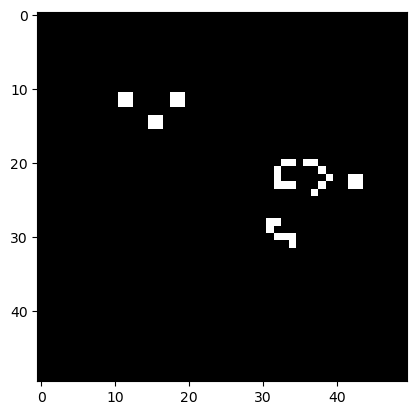

In [16]:
N = 50
Nt = 300
x = np.zeros((N,N,Nt))

x[:,:,0] = np.zeros((N,N))
ni = 10
nj = 10
### pattern for Simkin glider gun
x[1+ni,1+nj,0] = 1
x[2+ni,1+nj,0] = 1
x[1+ni,2+nj,0] = 1
x[2+ni,2+nj,0] = 1

x[1+ni,8+nj,0] = 1
x[2+ni,8+nj,0] = 1
x[1+ni,9+nj,0] = 1
x[2+ni,9+nj,0] = 1

x[4+ni,5+nj,0] = 1
x[5+ni,5+nj,0] = 1
x[4+ni,6+nj,0] = 1
x[5+ni,6+nj,0] = 1

x[10+ni,23+nj,0] = 1
x[10+ni,24+nj,0] = 1
x[10+ni,26+nj,0] = 1
x[10+ni,27+nj,0] = 1

x[11+ni,22+nj,0] = 1
x[11+ni,28+nj,0] = 1

x[12+ni,22+nj,0] = 1
x[12+ni,29+nj,0] = 1
x[12+ni,32+nj,0] = 1
x[12+ni,33+nj,0] = 1

x[13+ni,22+nj,0] = 1
x[13+ni,23+nj,0] = 1
x[13+ni,24+nj,0] = 1
x[13+ni,28+nj,0] = 1
x[13+ni,32+nj,0] = 1
x[13+ni,33+nj,0] = 1

x[14+ni,27+nj,0] = 1

x[18+ni,21+nj,0] = 1
x[18+ni,22+nj,0] = 1

x[19+ni,21+nj,0] = 1

x[20+ni,22+nj,0] = 1
x[20+ni,23+nj,0] = 1
x[20+ni,24+nj,0] = 1

x[21+ni,24+nj,0] = 1


plt.imshow(x[:,:,0],cmap='gray')
plt.show()

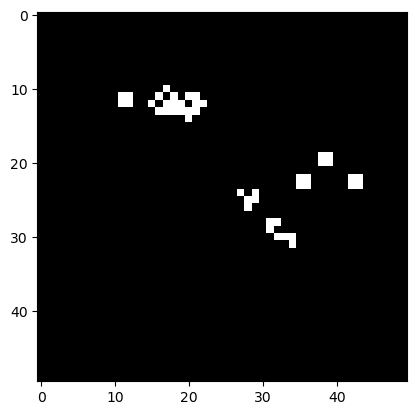

In [17]:
for n in range(0,Nt-1):
    x[:,:,n+1] = conwaystep2(x[:,:,n])
    
    
for n in range(0,Nt):
    sleep(0.01) # Sets the maximum animation speed
    plt.imshow(x[:,:,n],cmap='gray')
    clear_output(wait=True)
    plt.show()

### 2. Gosper glider gun

By whatever method you choose, implement the [Gosper glider gun](https://playgameoflife.com/lexicon/Gosper_glider_gun) as an initial condition. Here's a visual depiction where yellow cells are alive (1) and grey cells are dead (0).

<img src="gosper.png" width = 400>

I have entered the coordinates for the left-most square, so you need to complete the function `glidergun(N,ni,nj)` which fills in where all of the remaining live cells are. You can check the output by running the cell after the function definition.

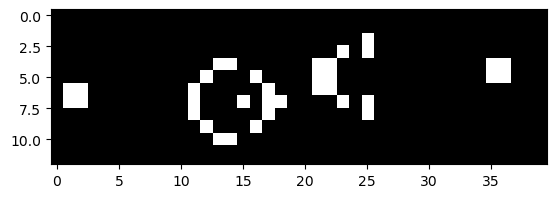

In [18]:
def glidergun(N,ni,nj):
    x = np.zeros((N,N))
    
    x[4+ni,1+nj] = 1
    x[4+ni,2+nj] = 1
    x[5+ni,1+nj] = 1
    x[5+ni,2+nj] = 1
    #ni = 2; nj = 0
    for i,j in ([[0+ni,25+nj],[1+ni,23+nj],[1+ni,25+nj],[2+ni,13+nj],[2+ni,14+nj],[2+ni,21+nj],[2+ni,22+nj],
                 [2+ni,35+nj],[2+ni,36+nj],[3+ni,12+nj],[3+ni,16+nj],[3+ni,21+nj],[3+ni,22+nj],[3+ni,35+nj],
                 [3+ni,36+nj],[4+ni,11+nj],[4+ni,17+nj],[4+ni,21+nj],[4+ni,22+nj],[5+ni,11+nj],[5+ni,15+nj],
                 [5+ni,17+nj],[5+ni,18+nj],[5+ni,23+nj],[5+ni,25+nj],[6+ni,11+nj],[6+ni,17+nj],[6+ni,25+nj],
                 [7+ni,12+nj],[7+ni,16+nj],[8+ni,13+nj],[8+ni,14+nj]]):
        x[i,j] = 1
    
    return x

x = glidergun(40,2,0)

plt.imshow(x,cmap="gray")
plt.ylim(12)
plt.show()

In [19]:
xtest = glidergun(40,0,0)
for i in range(0,3):
    xtest = conwaystep(xtest)
'''case1'''
assert np.isclose(xtest[1,:],np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,0., 0., 0., 0., 0., 0.]),atol=1e-9).all()
'''case2'''
assert np.isclose(xtest[3,:],np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,0., 1., 1., 0., 0., 0.]),atol=1e-9).all()
'''case3'''
assert np.isclose(xtest[5,:],np.array([0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1.,0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,0., 0., 0., 0., 0., 0.]),atol=1e-9).all()
'''case4'''
assert np.isclose(xtest[7,:],np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),atol=1e-9).all()
'''case5'''
assert np.isclose(xtest[9,:],np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,0., 0., 0., 0., 0., 0.]),atol=1e-9).all()


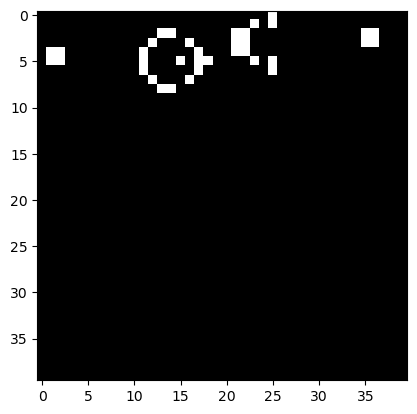

In [20]:
x = glidergun(40,0,0)

plt.imshow(x,cmap="gray")
plt.show()

Now behold the majesty of the Gosper glider gun in action. This uses a large enough grid that the period boundary conditions aren't an issue.

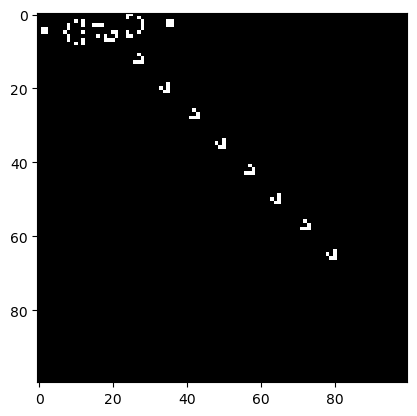

In [21]:
N = 100
Nt = 250
x = np.zeros((N,N,Nt))

x[:,:,0] = glidergun(N,0,0)


for n in range(0,Nt-1):
    x[:,:,n+1] = conwaystep(x[:,:,n])
    
    
for n in range(0,Nt):
    sleep(0.01) # Sets the maximum animation speed
    plt.imshow(x[:,:,n],cmap='gray')
    clear_output(wait=True)
    plt.show()

### 3. Forest fires

Consider the following simplified [model](https://itp.uni-frankfurt.de/~gros/StudentProjects/Projects_2020/projekt_lars_dingeldein/) of forest fires. Each cell on a two dimensional grid can be in one of three states (values): empty (0), trees (1), or fire (2). The system starts with some arrangement of trees and empty space. At each time step the following rules are applied to update the system:

- A tree grows spontaneously on an empty cell with probability $p$
- A tree starts burning spontaneously with probability $f$
- A tree will burn if one of its <i>four</i> nearest neighbors is on fire
- A burning cell turns into an empty cell.

The goal of this question is to implement this model in several steps. Let's first initialize an $N\times N$ system with 25% trees and 75% empty space. We assign 0 to empty cells and 1 to cells with trees. Therefore, you should scan over each cell and flip the cell to 1 with 25% probability. One simple way to do this is to generate a random number via `np.random.rand()`. The random value will be less than 0.25 25% of the time (why?). You can use this to test for whether to assign a tree to each cell. 

In [22]:
def initialize(N):
    x = np.zeros((N,N))
    for i in range(0,N):
        for j in range(0,N):
            p = np.random.rand()
            if(p < .25):
                x[i,j] = 1

    return x

In [23]:
'''case1'''
assert np.isclose(np.average(initialize(1000)), 0.25,atol=2e-1).all()


Now that we have an initial state, we can apply the rules. Make a set of nested loops to scroll through all cells. You can use the function `nn(i,j,N)` to generate the right/left/upper/lower indices using periodic boundary conditions. In applying the rules, you need do nothing if the cell has a value of 2 (on fire) since it will be reset to zero at the next step.

You can separate the remaining cases using an `if` statement. If the cell is empty, it will either remain empty or become a tree (with probability) $p$. You can generate a random number and test for whether it is less than $p$. If so, set the cell to 2. Otherwise, do nothing.

If the initial cell has a value of 1 (a tree present), then one of two things happens. If one of its four neighbors ($(i+1,j)$, $(i-1,j)$, $(i,j-1)$, or $(i,j+1)$) is on fire (has a value of $2$), then this cell will be on fire in the next step. If that is not the case, then it will catch fire with probability $f$. You can test for this option with the same technique used to determine if a tree grows. If none of these two cases occurs, then a tree is placed on cell at the next time step.

When testing for fire at the neighbors, a quick method is to just look at the maximum of the list

```[x[i,jl], x[i,jr], x[il,j], x[ir,j]]```

Since the fire cell has the value of 2 and you don't care <i>which</i> of these cells is on fire, you can be sure that a fire will be placed on the cell `[i,j]` if the maximum of that list is 2. Otherwise, you know that no neighboring cells are on fire.

In [24]:
def forestupdate(x,p,f):
    N = len(x)
#    xnew = np.zeros((N,N))
    xnew = x
    
    for i in range(0,N):
        for j in range(0,N):
            prob = np.random.rand()
            
            if(i >= N-1 or j >= N-1):
                if(xnew[i,j] == 2):
                    xnew[i,j] = 0
            
            if(xnew[i,j] == 0):
                if(prob < p):
                    xnew[i,j] = 1
                
            if(xnew[i,j] == 2):
                xnew[i,j] = 0
                if(i != N-1 and j != N-1):
                    if(xnew[i+1,j]==1):
                        xnew[i+1,j] = 2
                    if(xnew[i-1,j]==1):
                        xnew[i-1,j] = 2
                    if(xnew[i,j+1]==1):
                        xnew[i,j+1] = 2
                    if(xnew[i,j-1]==1):
                        xnew[i,j-1] = 2
            
            if(xnew[i,j] == 1):
                if(i != N-1 and j != N-1):
                    # if fire in neighbor
                    if(xnew[i+1,j] == 2 or xnew[i-1,j] == 2 or xnew[i,j-1] == 2 or xnew[i,j+1] == 2):
                        xnew[i,j] = 2
                    # fire prob
                    if(prob < f):
                        xnew[i,j] = 2

    return xnew

Once these basic functions are working, you can simulate the dynamics by adding a loop over time.

In [25]:
N = 40
p = 30/(N**2)
f = 0.1/(N**2)

Nt = 100
x = np.zeros((N,N,Nt))

x[:,:,0] = initialize(N)
            
for n in range(0,Nt-1):
    x[:,:,n+1] = forestupdate(x[:,:,n],p,f)

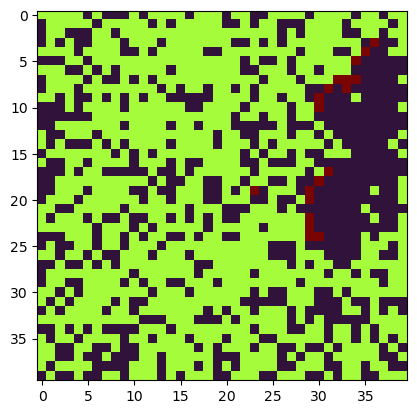

In [26]:
for n in range(0,Nt):
    sleep(0.01) # Sets the maximum animation speed
    plt.imshow(x[:,:,n],cmap='turbo',vmin=0, vmax=2)
    clear_output(wait=True)
    plt.show()

It's not incredibly impressive or interesting for the case $N=30$. But this also becomes computationally intense for larger systems. You can go up to about $N=100$ (maybe also increasing the number of steps to $\sim 1000$) and see the beginnings of more complex behavior.

As one last instructive task, complete the following function which counts how many cells are (a) empty, (b) trees, or (c) on fire. You might wish to employ logical indexing (e.g., `x[x==1]`) and the function `len()` to do this efficiently. But you could also do it with loops and counters.

In [27]:
def counts(x):
    empty = 0
    trees = 0
    fire = 0
    for i in range(0,len(x)):
        for j in range(0,len(x)):
            if(x[i,j] == 0):
                empty += 1
            elif(x[i,j] == 1):
                trees += 1
            else:
                fire += 1

    return empty, trees, fire

In [28]:
'''case1'''
xtest = np.array([[0,0,1,2],[0,0,0,1],[0,2,2,0],[1,2,0,1]])
assert np.isclose(counts(xtest), (8, 4, 4),atol=2e-1).all()
'''case2'''
xtest = np.array([[2,1,1,1],[1,2,1,1],[1,2,2,1],[2,1,0,1]])
assert np.isclose(counts(xtest), (1, 10, 5),atol=2e-1).all()


Lastly, fill in the following arrays with the empty/tree/fire "populations" at each time step and plot the <i>fraction</i> of each.

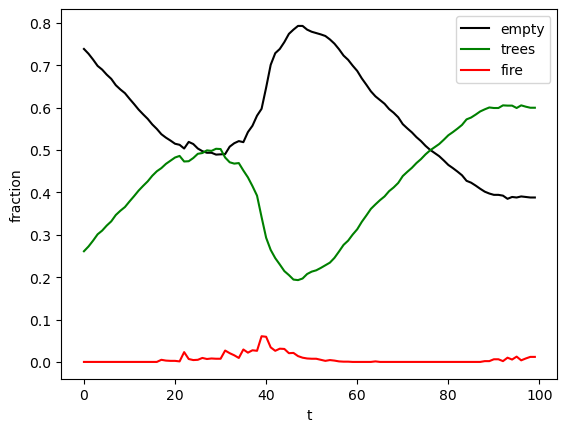

In [29]:
empty = np.zeros(Nt)
trees = np.zeros(Nt)
fire = np.zeros(Nt)

for i in range(0,Nt):
    empty[i], trees[i], fire[i] = counts(x[:,:,i])
    
t = np.linspace(0,Nt-1,Nt)    
plt.plot(t,empty/(N**2),'k-')
plt.plot(t,trees/(N**2),'g-')
plt.plot(t,fire/(N**2),'r-')
plt.legend(['empty','trees','fire'])
plt.xlabel('t')
plt.ylabel('fraction')
plt.show()

### 4. BZ chemical reaction

The [Belousov-Zhabotinsky (BZ) chemical reaction](https://www.scholarpedia.org/article/Belousov-Zhabotinsky_reaction) is an interesting, <i>oscillating</i> chemical reaction that once made an appearance on [Jimmy Kimmel](https://www.youtube.com/watch?v=3JH1wCKlR5s). 

When set up with a thin layer of liquid (i.e., in a petri dish), it's possible to observe spiral waves as different portions of the solution undergo the reaction at different times. Here's a [video](https://www.youtube.com/watch?v=LL3kVtc-4vY) showing the result as well as walking through how you might be able to get the necessary supplies to do it yourself. As it turns out, this type of spiral wave dynamics can also be simulated using a [cellular automaton](https://www.hermetic.ch/pca/bz.htm).

The rules for this model are a bit more complicated than for the forest fire model or Conway's game of life. Within a grid, each cell can take on a value between `1` and `q` (for some integer `q` we take as 200). We also select two integers `k1` and `k2` in the range 1 through 8 and an integer `g` in the range 0 through 100. We'll take `k1=2`, `k2=3`, and `g=70`. The updating proceeds as follows:

- A cell in state `q` changes to state `1`.
- A cell in state `1` changes to state `np.floor(a/k1) + np.floor(b/k2) + 1` where `a` is the number of neighbors of the cell which are in states `2` through `q-1` and `b` is the number of neighbors in state `q`.
- A cell in any of states `2` through `q-1` changes to `S/(9 - c) + g`, where `S` is the sum of the states of the cell and its neighbors and `c` is the number of neighbors in state `1`.
- If the application of these rules would result in a cell having a state larger than `q` then the state of that cell becomes `q`.

I would implement these rules in order. Given an array of values `x`, your task is to compute `xnew` based on these rules. It's easy to test for cases where `x[i,j]==q-1` or `x[i,j]==0`. You might want to use `nn(i,j,N)` to grab the neighbor indices (assume periodic boundary conditions) and then make a list of `x` values for all the neighbors.

In [91]:
def bzstep(x,q,k1,k2,g):
    N = len(x)
    xnew = np.zeros((N,N))
#    xnew = x
    for i in range(0,N):
        for j in range(0,N):
#            neighbors = nn2(i,j,N)
            (il,ir,jl,jr) = nn(i,j,N)
            neighbors = [ x[il,jl],x[il,j],x[il,jr],x[i,jl],x[i,jr],x[ir,jl],x[ir,j],x[ir,jr] ]
            
            a = b = c = 0
            for k in range(0,8):
                if(neighbors[k] == q):
                    b += 1
                elif(neighbors[k] != 1):
                    a += 1
                elif(neighbors[k] == 1):
                    c += 1
            
#            a = len([xnew[n,m] for n,m in neighbors if(2<= xnew[n,m] <=q-1)])
#            b = len([xnew[c,v] for c,v in neighbors if(xnew[c,v]==q)])
#            c = len([xnew[k,l] for k,l in neighbors if(xnew[k,l]==1)])
            
            if(x[i,j] == q):
                xnew[i,j] = 1
                
            elif(x[i,j] == 1):
                xnew[i,j] = np.floor(a/k1) + np.floor(b/k2) + 1
                
#            elif(2 <= x[i,j] <= q-1):
            else:
#                xnew[i,j] = (sum([xnew[neighbors[n],neighbors[m]] for n,m in neighbors(0,8)])+x[i,j])/(9-c) + g
                xnew[i,j] = (sum(neighbors)+ x[i,j])/(9-c) + g
            
            if(x[i,j] > q):
                xnew[i,j] = q
            
    return xnew

In [92]:
'''case1'''
xtest= np.array([[1,2,3,4],[4,5,6,7],[7,8,9,10],[11,12,13,14]])
assert np.isclose(bzstep(xtest,200,2,3,70), np.array([[ 5.        , 77.125     , 77.33333333, 77.875     ],[76.        , 75.625     , 76.        , 76.375     ],[78.66666667, 78.33333333, 79.33333333, 79.        ],[78.625     , 78.25      , 78.33333333, 79.        ]]),atol=2e-1).all()

Once you have the function working, you can make an animation and watch the appearance of spiral waves from some random configuration (each cell chosen a random value between `1` and `q`):

In [93]:
N = 50
Nt = 300
x = np.zeros((N,N,Nt))

q = 200
k1 = 2 
k2 = 3
g = 70


x[:,:,0] = np.random.randint(0,q,(N,N))+1

for n in range(0,Nt-1):
    x[:,:,n+1] = bzstep(x[:,:,n],q,k1,k2,g)

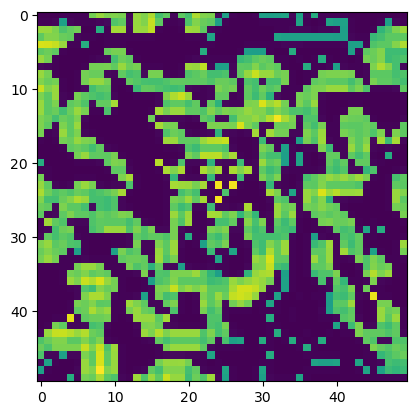

In [95]:
for n in range(0,Nt):
    sleep(0.01) 
    plt.imshow(x[:,:,n])#,cmap='hot')
    clear_output(wait=True)
    plt.show()

### 5. 1D random walk/diffusion

Recall the one-dimensional random walk we used earlier in the course. We showed that for an ensemble of particles beginning at the origin, the average squared distance scales like

$$\langle x^{2}(t) \rangle \sim t$$

This is unlike constant-velocity motion where $x\propto t$, and we refer to this type of transport as <b>diffusion</b>. Mathematically, some quantity $f(x,t)$ (density, temperature, etc.) exhibiting diffusion obeys the <b>diffusion equation</b>

$$\frac{\partial f}{\partial t} = D\frac{\partial^{2}f}{\partial x^{2}}$$

Think of a bottle of some kind of volatile gas (perfume, poison, the choice is yours). If you open this bottle, the molecules will diffuse through the air. Remarkably, the random walk turns out to be a pretty decent model for how these molecules move. In this exercise, you will show demonstrate that a highly localized initial concentration in which each molecule follows a random walk trajectory will spread in a manner consistent with the corresponding solution to the diffusion equation.

To be specific, let's assume we have some amount $A$ of substance located at a single point in space (say $x_{0}$). The solution to the diffusion equation for this initial configuration is 

$$f(x,t) = \frac{A}{\sqrt{4\pi D t}}\exp\left[-\frac{(x-x_{0})^{2}}{4Dt}\right]$$

In words, the distribution looks like a bell curve that gets shorter and wider with time. 

Below we define an initial density profile `ρ` which is zero everywhere except for two locations at the center. In each of those locations, we place `Np` particles so that the total number of particles is `2Np`. We will consider `N=100` spatial points and compute the evolution for `Nt=100` time steps.

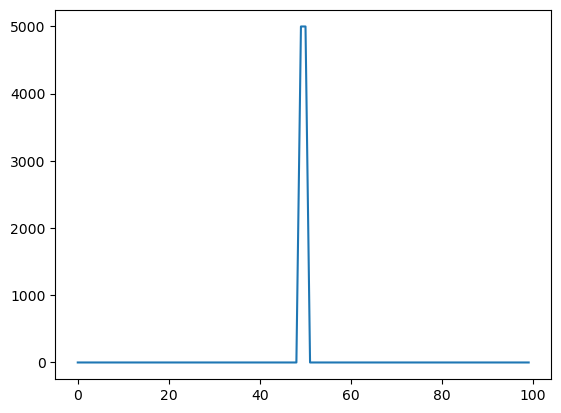

In [96]:
Np = 5000
N = 100
Nt = 100

ρ = np.zeros((N,Nt))
ic = int(np.floor(N/2))

ρ[ic-1:ic+1,0] = Np

plt.plot(np.linspace(0,N-1,N),ρ[:,0])
plt.show()

Complete the function below to perform a one-dimensional random walk for <i>each</i> particle in the system. What you want to do is scroll through all positions (a loop) and then perform another loop that runs from 0 to $n$, where $n$ is the number of particles at that location. This information is contained in `ρ[i,j]` as a floating point (e.g., 10.0), but you will need this value as an integer (e.g., 10). In calculations taking place in the <i>real</i> world, we don't have to distinguish between these two types of variables. But Python will only accept pure integers as limits on loops. Fortunately, you can use the `int()` function to convert a floating point to an integer.

Now let's say you have 10 particles at position `i`. For each one, you want to let it randomly move to the right or left (with equal probability). One way to do this would be to define a new index `inew`. Using `np.sign()`, `int()`, and `np.random.rand()`, you can generate an integer `a` which is equally likely to be `+1` or `-1`. Then `inew = i + a`. Once you have the location that the particle moves to, you can add one to `\rho` at that location.

One last wrinkle: if a particle gets to the edge, it's equally likely to move one in the other direction or go <i>outside</i> the boundary. That's fine, we can lose it. But before you set `ρnew[inew] = ρnew[inew] + 1`, check to make sure `inew` is between `0` and `N-1`. 

Also, keep in mind that the `ρ` passed to the function will be a one-dimensional slice of the `ρ` defined above which stores the information for each time step.

In [104]:
def rwalk1d(ρ):
    N = len(ρ)
    ρnew = np.zeros(N)
    for i in range(0,N):
        n = int(ρ[i])
        for k in range(n):
            a = int(np.sign(np.random.randint(0,2)-0.5))
            inew = i + a
            if(0 <= inew <= N-1):
                ρnew[inew] = ρnew[inew] + 1
            
    return ρnew

In [105]:
for n in range(0,Nt-1):
    ρ[:,n+1] = rwalk1d(ρ[:,n])

Now for the theoretical solution. Define a function which returns

$$\rho(x,t) = \frac{A}{\sqrt{4\pi D t}}\exp\left[-\frac{(x-x_{0})^{2}}{4Dt}\right]$$

Three minor things: for reasons that aren't important to us, $D\rightarrow 0.5$ turns out to be the correct answer for this system. More importantly, this function will run into trouble when $t=0$ (why?). To avoid this, you can use `t+0.01` everwhere you see a $t$ as you're implementing the formula. Lastly, you can take $x_{0}$ as $\frac{1}{2}N_{x}$ where $N_{x}$ is the length of the array of $x$ points (passed into the function below).

In [106]:
def ρt(t,x,A,D):
    return (A/(np.sqrt(4*np.pi*D*t+.01))) * np.exp(-((x-(.5*len(x)))**2)/(4*D*t+0.01))

In [107]:
'''case1'''
assert np.isclose(ρt(1,np.linspace(0,1,10),1,1), np.array([0.00057646, 0.00075663, 0.00098707, 0.00127983, 0.00164932,
       0.00211254, 0.00268936, 0.00340282, 0.00427932, 0.0053488 ]),atol=1e-3).all()

With all of that in order, take a look at the evolution. The theoretical curve is plotted as a dashed line, while the noisy, blue curve represents the random walk simulation.

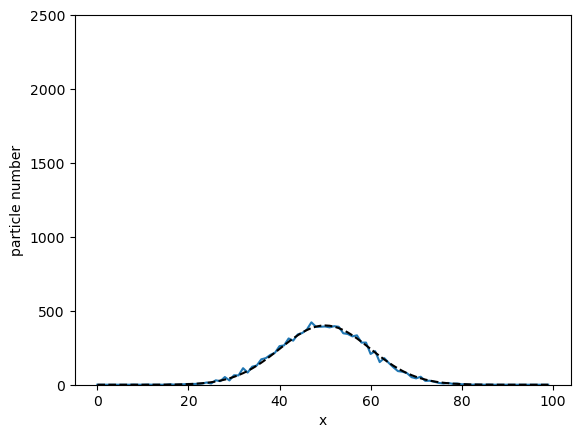

In [108]:
A = sum(ρ[:,0])
D = 0.5
t = np.linspace(0,Nt-1,Nt)
x = np.linspace(0,N-1,N)
ρtheory = np.zeros((N,Nt))

for n in range(0,Nt):
    sleep(0.01) # Sets the maximum animation speed
    plt.plot(x,ρ[:,n])
    plt.plot(x,ρt(t[n],x,A,D),'k--')
    plt.xlabel('x')
    plt.ylabel('particle number')
    plt.ylim(0,Np/2)
    clear_output(wait=True)
    plt.show()

<b>Note to clear my conscience:</b> I've used $\rho$, which is suggestive of a density. We're actually working with raw particle number in this toy model of a few thousand particles. To make it a density, we should divide by the total number of particles ("normalizing" the function). But it's an added complication that doesn't add much insight to the task at hand.

### 6. 2D random walk/diffusion

Just for fun, let's generalize to a two-dimensional random walk. Before dealing with the multiple particle case, we can begin with the random walk of a single particle in two dimensions. The good news is that this is just a one-dimensional random walk for each direction.

Let's suppose we begin with a particle at the origin. We will store its `x` and `y` positions as separate arrays.

In [109]:
Nt = 1000
x = np.zeros(Nt)
y = np.zeros(Nt)

Given a position $(x,y)$, the particle executes a random displacement in the $x$-direction <i>and</i> in the $y$-direction. Complete the function below to accomplish this.

In [110]:
def rw2d(x,y):
    xnew = x + int(np.sign(np.random.randint(0,2)-0.5))
    ynew = y + int(np.sign(np.random.randint(0,2)-0.5))

    return xnew, ynew

Now we iterate and plot the trajectory. The starting position is denoted with a blue circle, while the ending position is shown as a red circle.

In [111]:
for n in range(0,Nt-1):
    x[n+1], y[n+1] = rw2d(x[n],y[n])

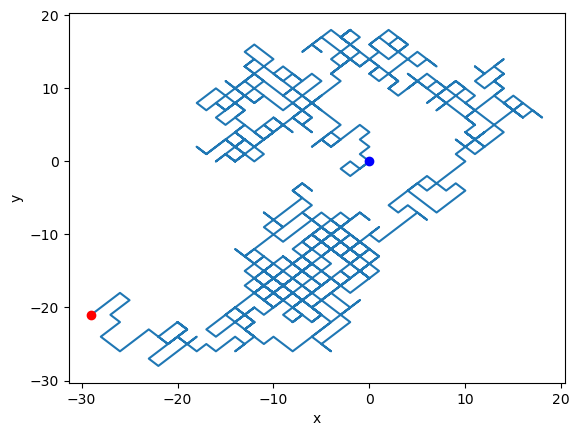

In [112]:
plt.plot(x,y)
plt.plot(x[0],y[0],'bo')
plt.plot(x[Nt-1],y[Nt-1],'ro')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

The diagonal lines arise because each step involves moving in both direction (hence, <i>diagonally</i>). We <i>could</i> add a couple of extra lines to show the motion on the actual "grid," but it's probably more effort than it's worth. Try cranking up `Nt` to see what kinds of patterns you get.

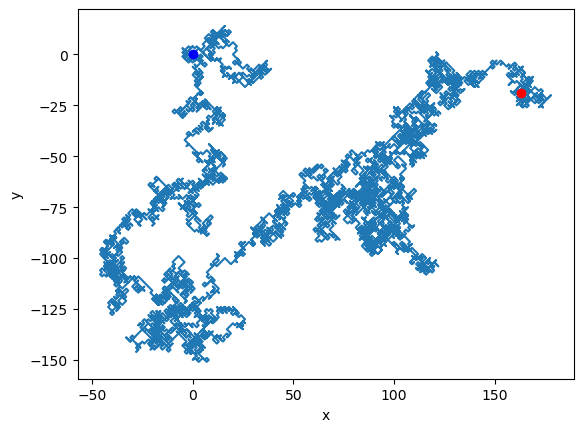

In [113]:
Nt = 10000
x = np.zeros(Nt)
y = np.zeros(Nt)

for n in range(0,Nt-1):
    x[n+1], y[n+1] = rw2d(x[n],y[n])
    
plt.plot(x,y)
plt.plot(x[0],y[0],'bo')
plt.plot(x[Nt-1],y[Nt-1],'ro')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

The <i>claim</i> is that a trajectory like this is qualitatively similar to that of a single molecule (of say, perfume... or poison gas) diffusing through the air. 

Now, let us consider a large number of particles initially localized near the origin, like you just did in one dimension. Instead of a plot, the most effective visualization is an image plot, or heat map.

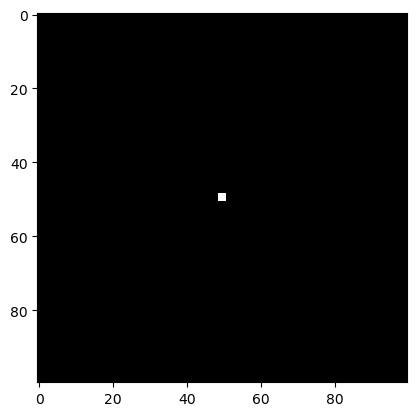

In [114]:
Np = 5000
N = 100
Nt = 100

ρ = np.zeros((N,N,Nt))
ic = int(np.floor(N/2))
jc = int(np.floor(N/2))

ρ[ic-1:ic+1,jc-1:jc+1,0] = Np

plt.imshow(ρ[:,:,0],cmap='gray')
plt.show()

Generalize your function `rwalk1d()` to scan over a two-dimensional system and perform a random walk step in two dimensions on each particle.

In [115]:
def rwalk2d(ρ):
    N = len(ρ)
    ρnew = np.zeros((N,N))
    
    for i in range(0,N):
        for j in range(0,N):
            n = int(ρ[i,j])
            for k in range(0,n):
                xnew = i + int(np.sign(np.random.rand()-0.5))
                ynew = j + int(np.sign(np.random.rand()-0.5))
                if(0 <= xnew <= N-1) and (0 <= ynew <= N-1):
                    ρnew[xnew,ynew] = ρnew[xnew,ynew]+1

    return ρnew

In [116]:
for n in range(0,Nt-1):
    ρ[:,:,n+1] = rwalk2d(ρ[:,:,n])

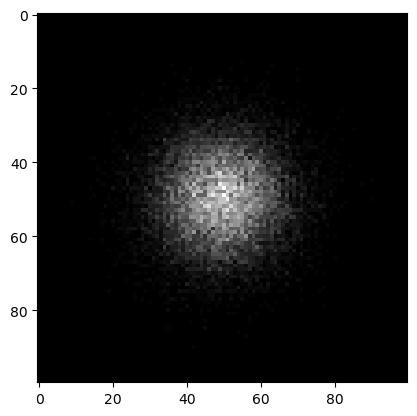

In [117]:
for n in range(0,Nt):
    sleep(0.01) # Sets the maximum animation speed
    plt.imshow(ρ[:,:,n],cmap='gray')
    clear_output(wait=True)
    plt.show()